In [1]:
from scipy.spatial.distance import pdist
import collections
import seaborn as sns
import subprocess
import numpy as np
import itertools as it
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from  imp import reload
import sys
#sys.path.insert(1, '../top-k-mallows')
#sys.path.insert(1, '../permus_util')

import mallows_kendall as mk
import permutil as pu


In [2]:
# n = 5
# perm = np.random.permutation(n)
# perm = np.arange(n)[::-1]
# perm = [0,2,1,3]
# M = pu.sample_to_marg_rel(np.array([perm]))
# trace = np.array([(n-i-1) - M.diagonal(i).sum(dtype=int) for i in range(1,n)][::-1])
# perm, trace,M

def get_depth(perm,P):
  return N - pu.dist_to_sample(perm,P,dist='k')

def get_trace(perm):
  n = len(perm)
  M = pu.sample_to_marg_rel(np.array([perm]))
  trace = np.array([(n-i) - M.diagonal(i).sum(dtype=int) for i in range(1,n)][::-1])
  return trace

def P_2_Q(P): return  P[n-1,:-1]

def trace_2_depth(n,trace,Q):
    return N - (trace*(1-Q) + Q * (np.arange(n-1)+1-trace)).sum()
# get_trace([0,1,2,3,4]),get_trace([6,5,4,3,2,1,0])

In [3]:
reload(pu)
reload(mk)
n = 8
N = int(n*(n-1)/2)
mid = 0
mname, params, mtext, mtextlong = pu.select_model(mid, n)
print(mname, params, mtext, mtextlong)
P = pu.get_P(n,model=mname,params=params)
Q = P_2_Q(P)


depthslower , depthsupper = [],[]
trupper = np.zeros((n-1),dtype=int)
trlower = np.zeros((n-1),dtype=int)
posupper, poslower = 1,0

depthsupper.append([0,trace_2_depth(n,trlower,Q)])
for d in range(1,N+1):
  trupper[-posupper] += 1
  print("upper", trupper,d,N,n)
  if trupper[-posupper] == n-posupper:
    posupper += 1
  depthsupper.append([d,trace_2_depth(n,trupper,Q),trupper.copy()])

depthslower.append([0,trace_2_depth(n,trlower,Q)])
d = 1
for i in range(n-1):
  for j in reversed(range(i,n-1)):
    trlower[j] += 1
    print("lower", trlower, d,trace_2_depth(n,trlower,Q))
    depthslower.append([d,trace_2_depth(n,trlower,Q),trlower.copy()])
    d += 1
    
#     print(trupper)
a = pd.DataFrame(depthslower,columns=['Distance', 'Depth lower','trace lower'] ) 
b = pd.DataFrame(depthsupper,columns=['Distance', 'Depth upper','trace upper'] ) 
dfboundsQuick = pd.merge(a,b)

res = [] # slow
for perm in it.permutations(range(n)):
  D = get_depth(perm,P)
  d = mk.distance(perm)
#   if d == 5 : print("FULL", d,D,get_trace(perm))
  res.append([d,D,perm,get_trace(perm)])
dfD = pd.DataFrame(res,columns=['Distance','Depth','perm','trace'])
a = dfD[['Distance','Depth']].groupby('Distance').min().reset_index()
a.columns = ['Distance', 'Depth lower slow']
b = dfD[['Distance','Depth']].groupby('Distance').max().reset_index()
b.columns = ['Distance', 'Depth upper slow']
dfslow = pd.merge(a,b)
dfbounds = pd.merge(dfslow,dfboundsQuick)
dfbounds

mm_ken 0.375 MM_peaked Mallows model, peaked
upper [0 0 0 0 0 0 1] 1 28 8
upper [0 0 0 0 0 0 2] 2 28 8
upper [0 0 0 0 0 0 3] 3 28 8
upper [0 0 0 0 0 0 4] 4 28 8
upper [0 0 0 0 0 0 5] 5 28 8
upper [0 0 0 0 0 0 6] 6 28 8
upper [0 0 0 0 0 0 7] 7 28 8
upper [0 0 0 0 0 1 7] 8 28 8
upper [0 0 0 0 0 2 7] 9 28 8
upper [0 0 0 0 0 3 7] 10 28 8
upper [0 0 0 0 0 4 7] 11 28 8
upper [0 0 0 0 0 5 7] 12 28 8
upper [0 0 0 0 0 6 7] 13 28 8
upper [0 0 0 0 1 6 7] 14 28 8
upper [0 0 0 0 2 6 7] 15 28 8
upper [0 0 0 0 3 6 7] 16 28 8
upper [0 0 0 0 4 6 7] 17 28 8
upper [0 0 0 0 5 6 7] 18 28 8
upper [0 0 0 1 5 6 7] 19 28 8
upper [0 0 0 2 5 6 7] 20 28 8
upper [0 0 0 3 5 6 7] 21 28 8
upper [0 0 0 4 5 6 7] 22 28 8
upper [0 0 1 4 5 6 7] 23 28 8
upper [0 0 2 4 5 6 7] 24 28 8
upper [0 0 3 4 5 6 7] 25 28 8
upper [0 1 3 4 5 6 7] 26 28 8
upper [0 2 3 4 5 6 7] 27 28 8
upper [1 2 3 4 5 6 7] 28 28 8
lower [0 0 0 0 0 0 1] 1 23.98496013623346
lower [0 0 0 0 0 1 1] 2 23.305484972222214
lower [0 0 0 0 1 1 1] 3 22.478110821164

,Distance,Depth lower slow,Depth upper slow,Depth lower,trace lower,Depth upper,trace upper
0,0,24.439506,24.439506,24.439506,None,24.439506,None
1,1,23.984960,23.984960,23.984960,"[0, 0, 0, 0, 0, 0, 1]",23.984960,"[0, 0, 0, 0, 0, 0, 1]"
2,2,23.305485,23.530415,23.305485,"[0, 0, 0, 0, 0, 1, 1]",23.530415,"[0, 0, 0, 0, 0, 0, 2]"
3,3,22.478111,23.075869,22.478111,"[0, 0, 0, 0, 1, 1, 1]",23.075869,"[0, 0, 0, 0, 0, 0, 3]"
4,4,21.564794,22.621324,21.564794,"[0, 0, 0, 1, 1, 1, 1]",22.621324,"[0, 0, 0, 0, 0, 0, 4]"
5,5,20.606042,21.941849,20.606042,"[0, 0, 1, 1, 1, 1, 1]",22.166778,"[0, 0, 0, 0, 0, 0, 5]"
6,6,19.624891,21.262373,19.624891,"[0, 1, 1, 1, 1, 1, 1]",21.712233,"[0, 0, 0, 0, 0, 0, 6]"
7,7,18.633246,20.807828,18.633246,"[1, 1, 1, 1, 1, 1, 1]",21.257687,"[0, 0, 0, 0, 0, 0, 7]"
8,8,18.118041,19.980454,18.178701,"[1, 1, 1, 1, 1, 1, 2]",20.578212,"[0, 0, 0, 0, 0, 1, 7]"
9,9,17.204724,19.300979,17.499225,"[1, 1, 1, 1, 1, 2, 2]",19.898737,"[0, 0, 0, 0, 0, 2, 7]"


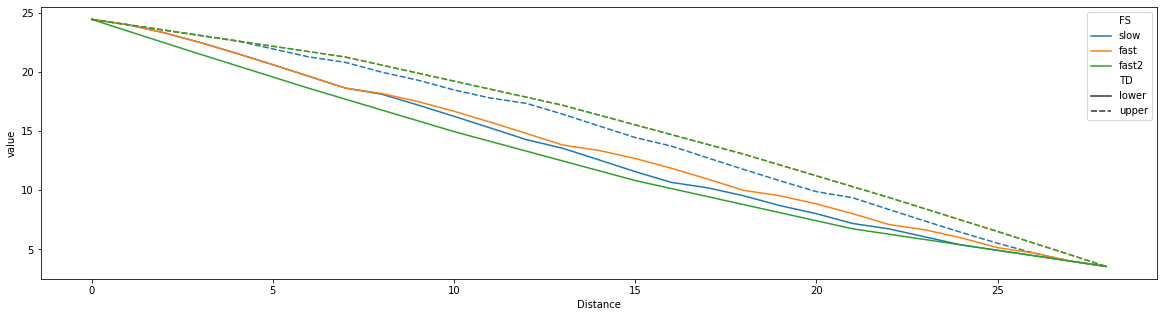

In [4]:
def get_bounds_2(P):
  n,l = P.shape
  N = n*(n-1)/2
  lis0 = []
  for i in range(n):
      for j in range(i): # use np.triu(pairw)
        lis0.append(P[i,j])
  lis0.sort(reverse=True)
#   print(lis0)
  lis0 = np.array(lis0)
  p0 = np.sum(lis0) 
  bounds = []
  for i in range (1+int(n*(n-1)/2)):
    mi = N - (p0 + np.sum([(1-lis0[ j]) - lis0[ j] for j in range(i)]))
    ma = N - (p0 + np.sum([(1-lis0[-j-1]) - lis0[-j-1] for j in range(i)]))
    bounds.append([ma,mi])
  df = pd.DataFrame(bounds, columns=['fast2 lower', 'fast2 upper'])
  df['Distance'] = range(len(df))
  return df
# get_bounds_2(P)

df = dfbounds.drop(['trace lower', 'trace upper'],axis=1)
df = pd.merge(df,get_bounds_2(P))
# print(df)
df = df.melt(id_vars='Distance')#, columns=['Depth lower slow', 'Depth upper slow', 'Depth lower', 'Depth upper'], 
df['TD'] = 'upper'
df.loc[df.variable.str.contains('lower'),'TD'] = 'lower'
df['FS'] = 'fast'
df.loc[df.variable.str.contains('slow'),'FS'] = 'slow'
df.loc[df.variable.str.contains('fast2'),'FS'] = 'fast2'
fig,ax = plt.subplots(figsize=(20,5))
sns.lineplot(data=df,x='Distance', y='value', style='TD', hue='FS')


In [5]:
dist = 8
df[(df.Distance==dist)&(df.TD=='lower')]

,Distance,variable,value,TD,FS
8,8,Depth lower slow,18.118041,lower,slow
66,8,Depth lower,18.178701,lower,fast
124,8,fast2 lower,16.782668,lower,fast2


In [6]:
dist = 8
lowerD = dfslow.loc[dfslow.Distance==dist,'Depth lower slow'].iloc[0]
upperD = dfslow.loc[dfslow.Distance==dist,'Depth upper slow'].iloc[0]
print("bound fast", dfboundsQuick[dfboundsQuick.Distance==dist])
dfD[(dfD.Distance==dist)&(dfD.Depth==lowerD)]
# dfslow

bound fast    Distance  Depth lower            trace lower  Depth upper  \
8         8    18.178701  [1, 1, 1, 1, 1, 1, 2]    20.578212   

             trace upper  
8  [0, 0, 0, 0, 0, 1, 7]  


,Distance,Depth,perm,trace
5920,8,18.118041,"(1, 2, 3, 4, 6, 7, 0, 5)","[0, 1, 1, 1, 2, 2, 1]"
14400,8,18.118041,"(2, 7, 0, 1, 3, 4, 5, 6)","[0, 1, 1, 1, 2, 2, 1]"
